# Case study on Supervised learning

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment

In [42]:
data = pd.read_excel('iris.xls')

In [43]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [46]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do necessary pre-processing steps.


#check for null values

In [48]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

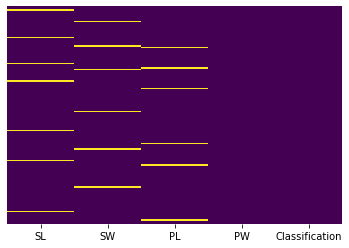

In [49]:
sns.heatmap(data.isnull(), yticklabels=False ,cbar=False , cmap='viridis')

<AxesSubplot:ylabel='Frequency'>

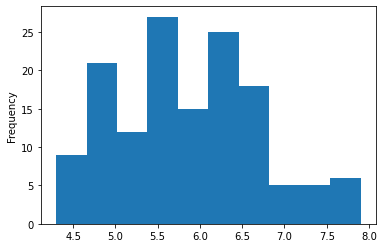

In [50]:
data["SL"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

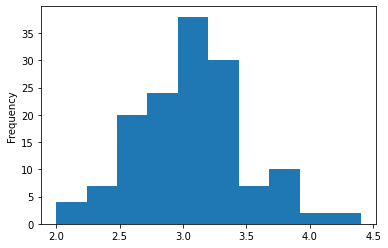

In [51]:
data["SW"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

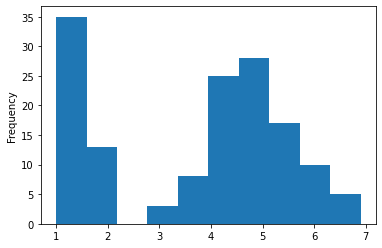

In [52]:
data["PL"].plot(kind="hist")

In [53]:
#filling missing values with median
data["SL"]=data["SL"].fillna(data["SL"].median())
data["SW"]=data["SW"].fillna(data["SW"].median())
data["PL"]=data["PL"].fillna(data["PL"].median())

In [54]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

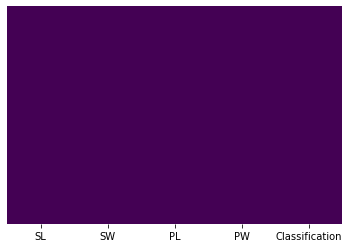

In [55]:
sns.heatmap(data.isnull(), yticklabels=False ,cbar=False , cmap='viridis')

In [56]:
# to handle outliers
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Text(0.5, 1.0, 'Boxplot of Sepal Length')

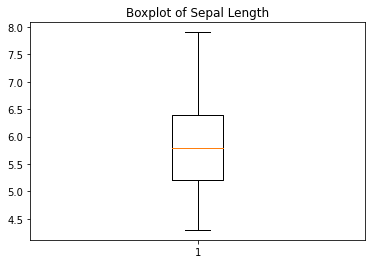

In [57]:
plt.boxplot(data['SL'])
plt.title('Boxplot of Sepal Length')

Text(0.5, 1.0, 'Boxplot of Sepal Width')

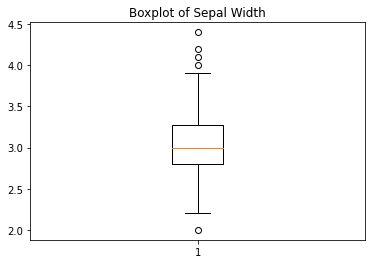

In [58]:
plt.boxplot(data['SW'])
plt.title('Boxplot of Sepal Width')

Text(0.5, 1.0, 'Boxplot of Petal Length')

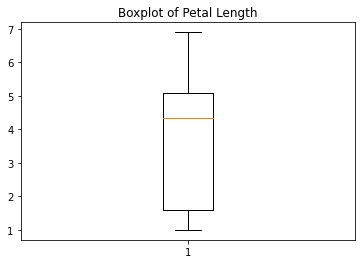

In [59]:
plt.boxplot(data['PL'])
plt.title('Boxplot of Petal Length')

Text(0.5, 1.0, 'Boxplot of Petal Width')

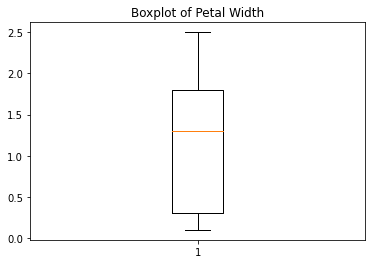

In [60]:
plt.boxplot(data['PW'])
plt.title('Boxplot of Petal Width')

The boxplot of Sepal Width contains some outliers .We can use IQR to manage this outliers

In [61]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

2.8 3.0 3.25


In [62]:
data['SW'].median()

3.0

In [63]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [64]:
print(IQR)
print(low_lim)
print(up_lim)

0.4500000000000002
2.1249999999999996
3.9250000000000003


In [65]:
outlier=[]
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [66]:
ind1=data['SW']<low_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

Text(0.5, 1.0, 'Boxplot of Sepal Width')

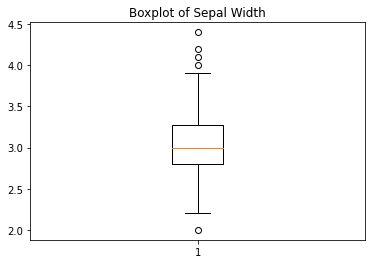

In [67]:
plt.boxplot(data['SW'])
plt.title('Boxplot of Sepal Width')

In [68]:
#One hot encoding
data=pd.get_dummies(data)

In [69]:
data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


<AxesSubplot:>

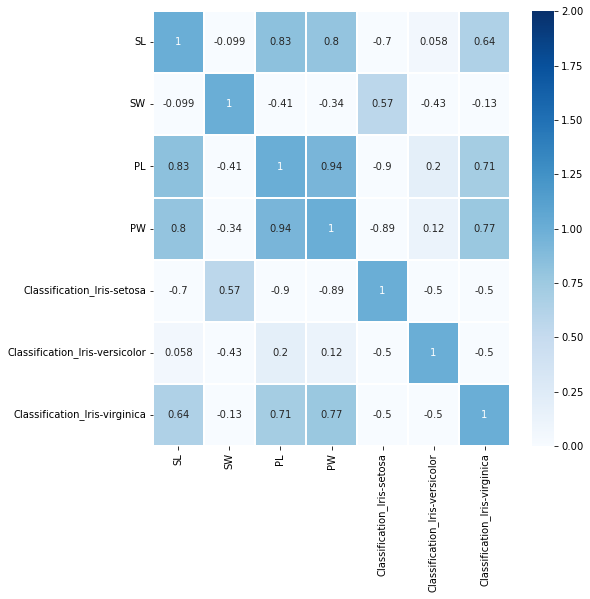

In [71]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corrmatrix,vmin=0,vmax=2,annot=True,linewidth=0.2,cmap='Blues')